# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png">
***

In [63]:
# Prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy.stats import pearsonr

# Argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when we have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do we estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

In regards to linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [64]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [65]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [66]:
boston.data.shape

(506, 13)

In [67]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [68]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [69]:
# Create dataframe
bos = pd.DataFrame(boston.data)

# Print first 5 rows
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [70]:
# Add column headers
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [71]:
print(boston.target.shape)

(506,)


In [72]:
# Add target/dependent variable
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [73]:
# Summary statistics
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

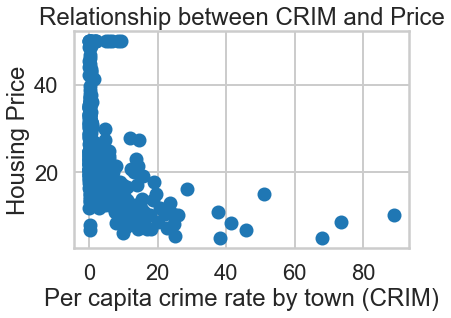

In [74]:
# Create and annotate scatterplot
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


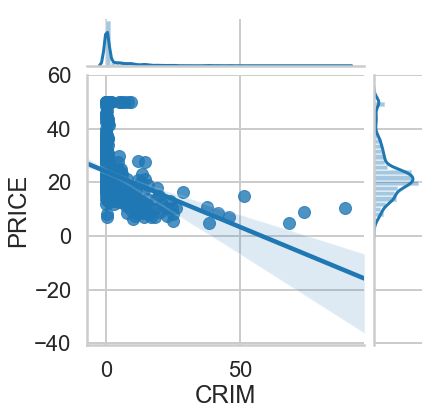

In [75]:
# Describe relationship
sns.jointplot('CRIM','PRICE', bos, kind='reg')
plt.show()

The plot shows that the median housing price and per capita crime rate by town (CRIM) are negatively correlated with each other.  As CRIM increases, median housing price decreases.  The dependence looks non-linear as price drops significantly at the CRIM value of 0, then continuously declines until flattening out around the CRIM value of 45 and above.  

What's interesting about this data is that the median house prices max out at 50 (in 1000's). Based on the current information, it's not clear whether these are outliers, arbitrary cutoff, or something else.

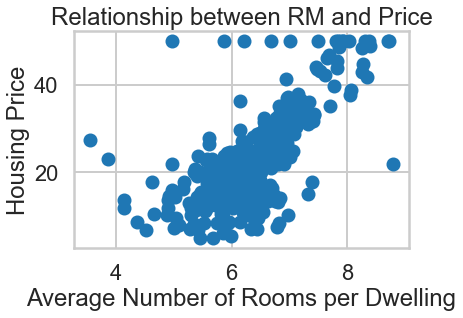

In [76]:
# Scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

The plot shows that median housing prices generally increase with the average number of rooms per dwelling.  This results in a positive correlation between the two and pretty much means that the more rooms a house has, the higher its price will be.

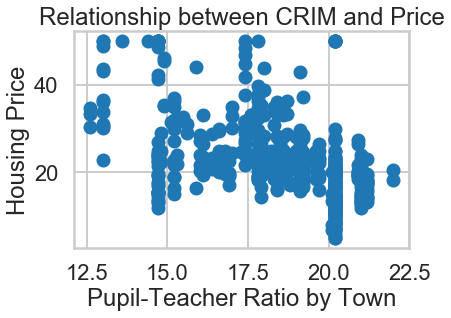

In [77]:
# Scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio by Town")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

The plot shows that median housing prices generally go down as the pupil-to-teacher ratio goes up.  But at each pupil-teacher ratio, there is still a wide spread of housing prices.  We will now examine a few other features that we find correlate to median housing price.

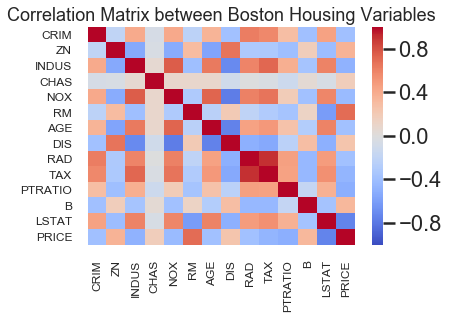

In [81]:
# Use correlation matrix to identify other features of interest
corr = bos.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=True, yticklabels=True, cmap='coolwarm')
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Correlation Matrix between Boston Housing Variables', size=18)
plt.show()

According to the matrix, median housing price has some reasonable correlations with % lower status of the population (LSTAT), nitric oxides concentration (NOX) and industry (INDUS).  We will examine those features.

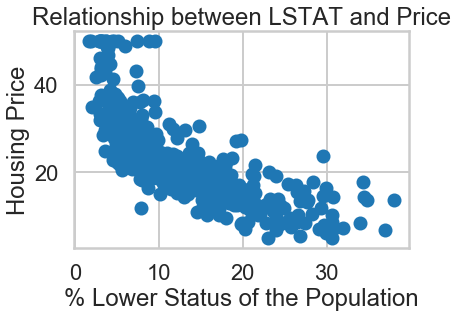

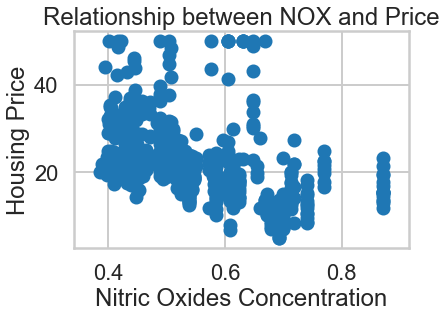

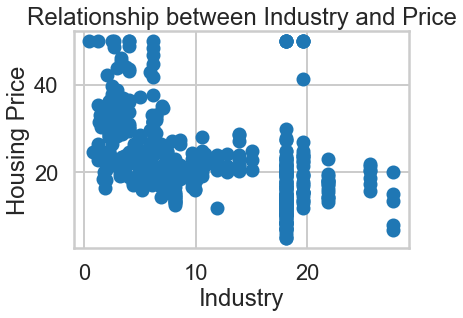

In [82]:
# Scatter plot between *LSTAT* and *PRICE*
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% Lower Status of the Population")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")
plt.show()

# Scatter plot between *NOX* and *PRICE*
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitric Oxides Concentration")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")
plt.show()

# Scatter plot between *INDUS* and *PRICE*
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Industry")
plt.ylabel("Housing Price")
plt.title("Relationship between Industry and Price")
plt.show()

The plots show negative correlations between the above mentioned features and median housing price.  Some are strong, while others are moderate.  In particular, % lower status of the population (LSTAT) shows an almost linear negative correlation to median housing prices, while the industry and nitric oxides concentration has a wider range of price spread for specific data points.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

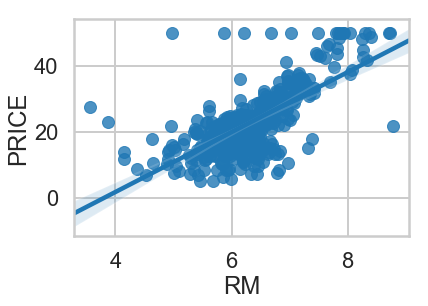

In [83]:
# Create scatterplot with regression line
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg=True)
plt.show()

### Histograms
***


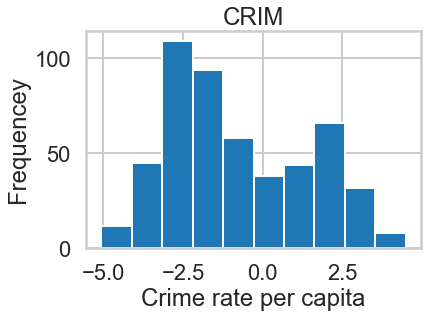

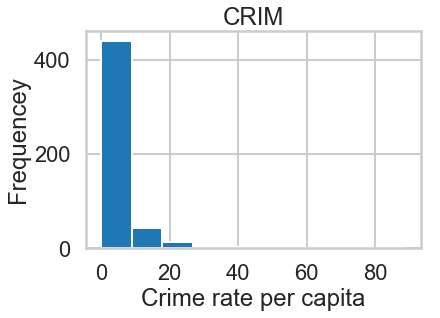

In [84]:
np.log10(100) # log(100) in a calculator with a base of 10 which will equal 2... 10^2 = 100
np.log(100) # ln(100) in a calculator with a base of 2.718281828459 which will equal 4.60517018599

# Histogram with np.log()
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

# Histogram without np.log()
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

In the first histogram, we used a [natural logarithm](https://en.wikipedia.org/wiki/Natural_logarithm) which has a base of 2.718281828459.  Essentially, the function, np.log(), determines the number of how many times 2.718281828459 has to be multiplied by itself to reach whatever number is within the parentheses and then returns that number.

Logarithms are generally used mostly because of skewed distribution. Logarithm naturally reduces the dynamic range of a variable so the differences are preserved while the scale is not that dramatically skewed. Imagine some people got 100,000,000 loan and some got 10000 and some 0. Any feature scaling will probably put 0 and 10000 so close to each other as the biggest number anyway pushes the boundary. Logarithm solves the issue.

Taking the logrithm not only helps to reveal more information about frequency at lower crime rate per capita (which is otherwise all cluttered together), but also helps to show the frequency counts at higher crime rate per capita (which is otherwise too dispersed with frequencies too close to zero to read). 

By making the logrithm transformation, we now see that more than half the crime rate per capita is below 1, and the most frequent crime rate is between 0.05 and 0.5. On the other hand, there are also around 60 towns with higher than 20 crime rate per capita, the overall distribution on the logrithmic scale is bimodal.

Lets now plot some more histograms and try to find correlations in predictors.

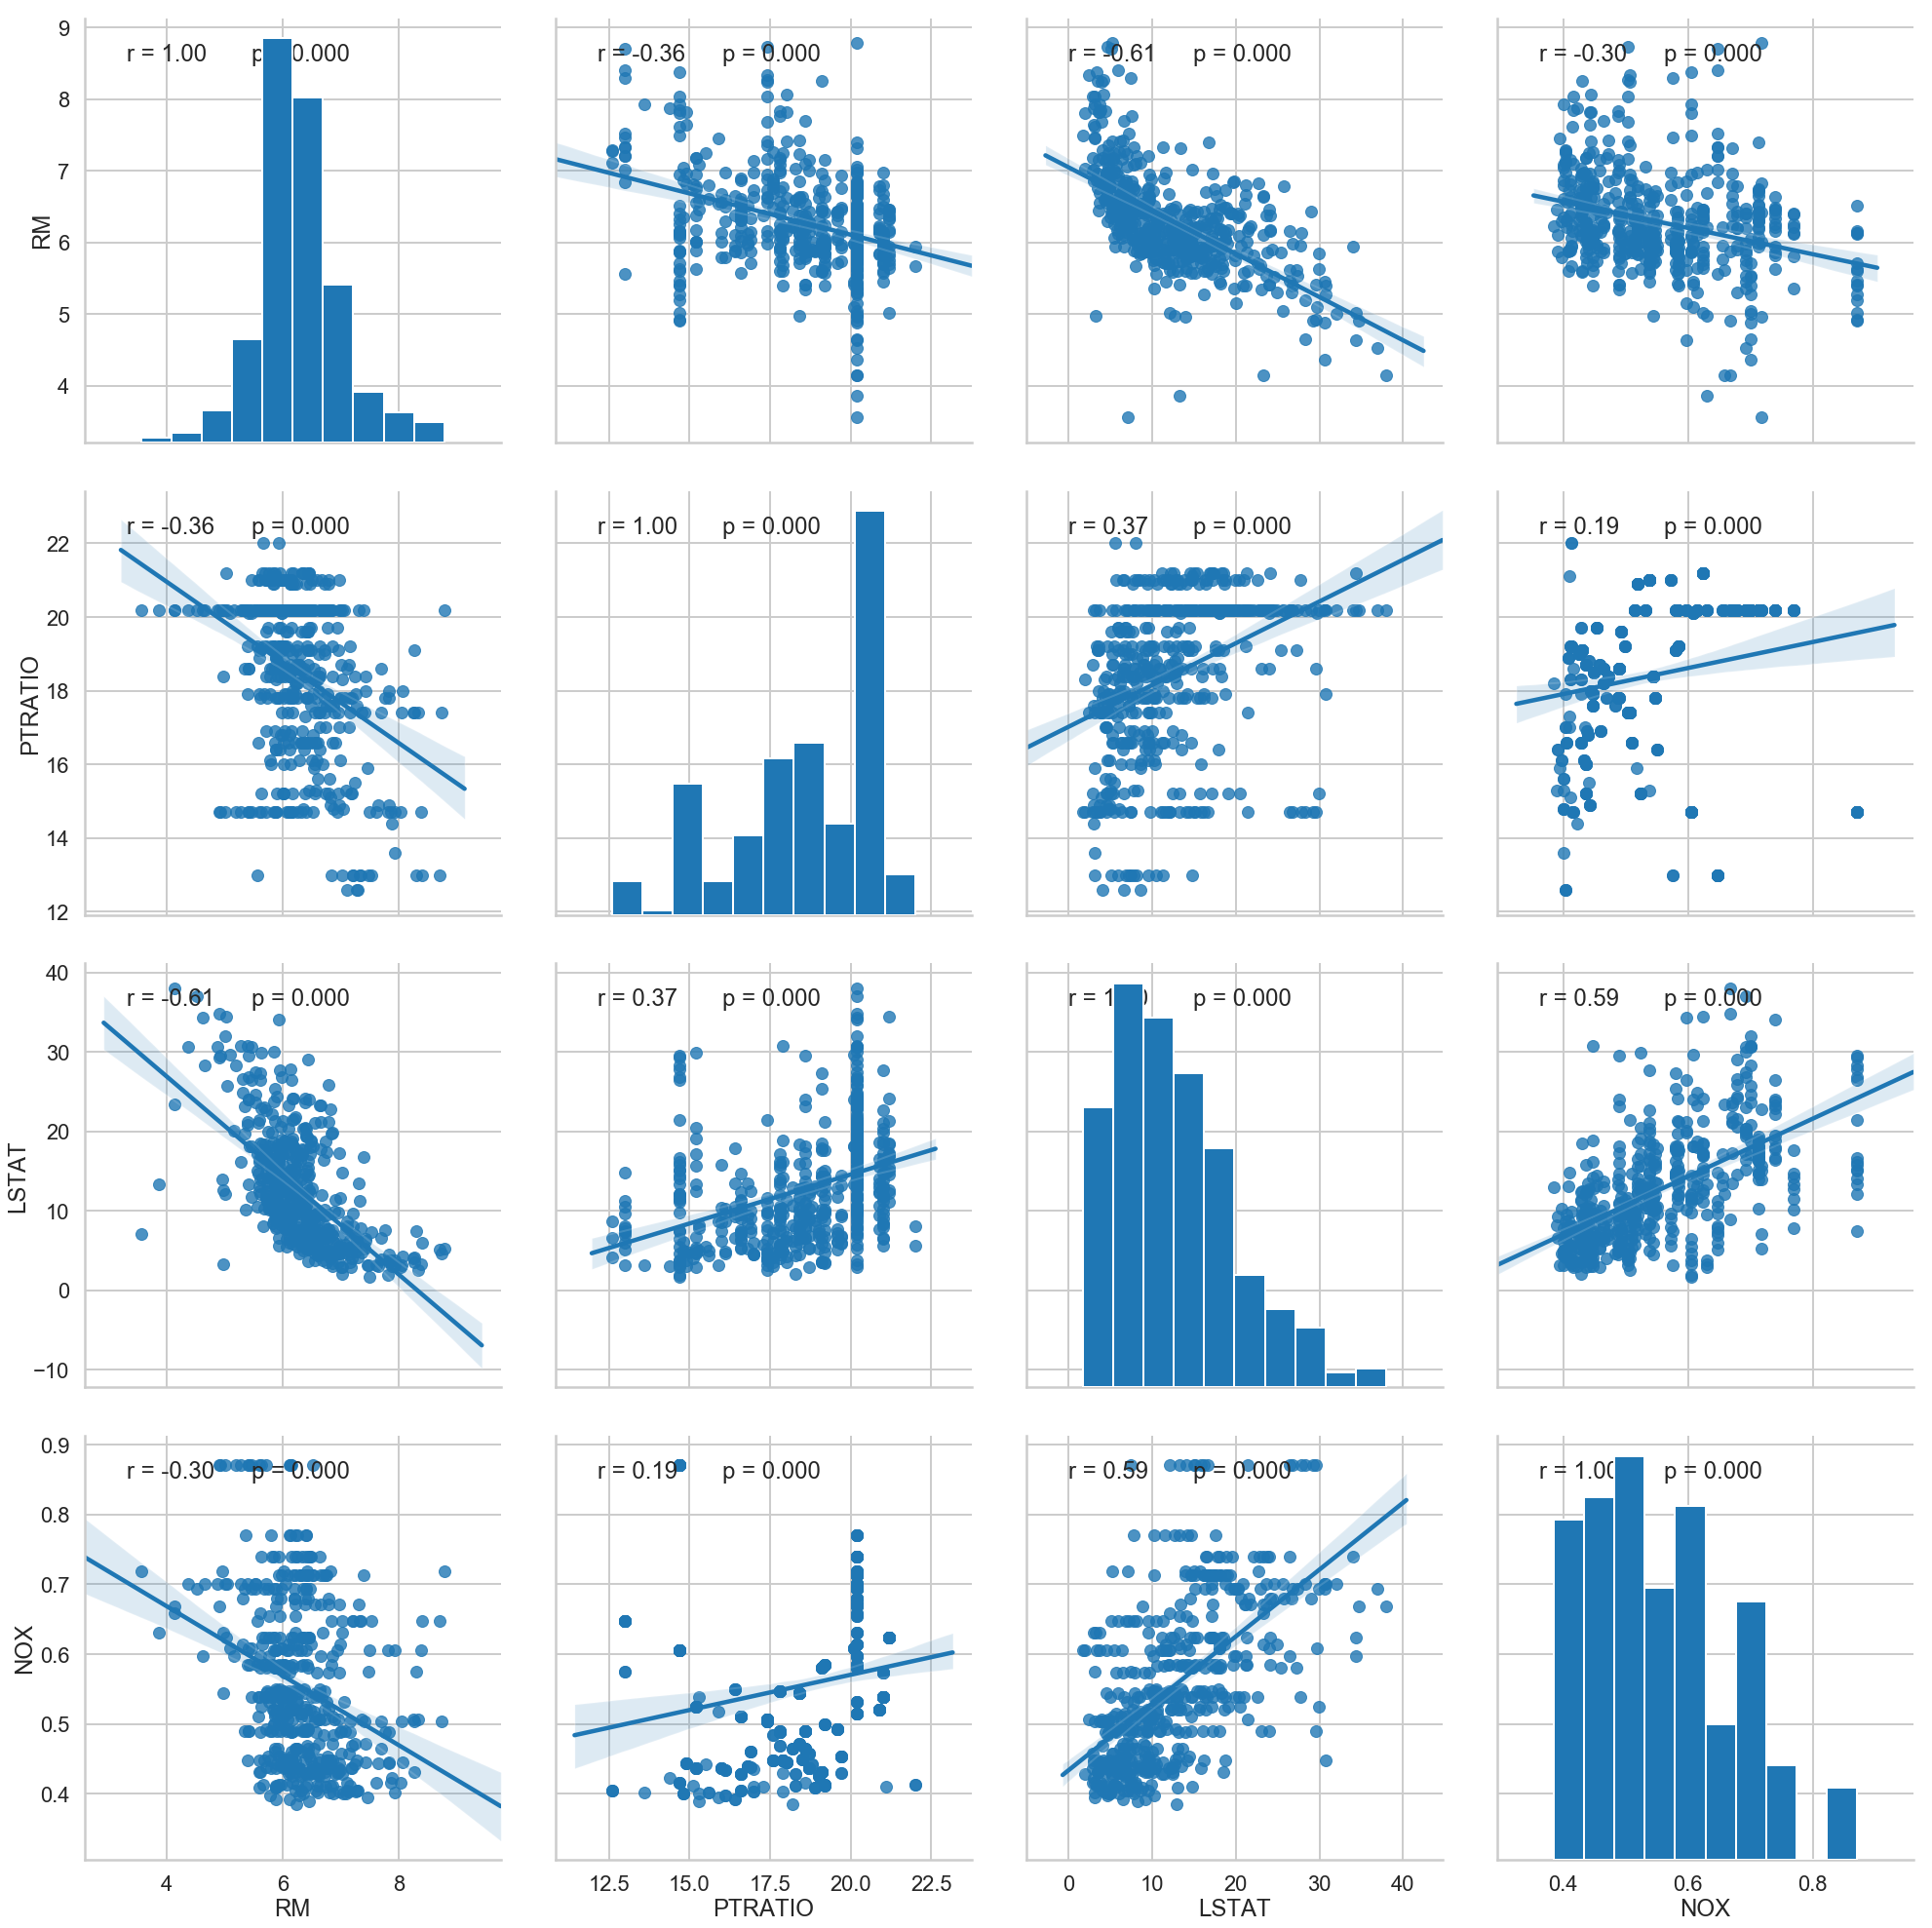

In [86]:
# Pearson correlation function
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

# Plot graphs
p = sns.pairplot(bos, vars=["RM", "PTRATIO", "LSTAT", "NOX"], height=7, kind="reg")
p.map(corrfunc)
plt.show()

As we can see above, RM and LSTAT have a negative correlation with eachother while PTRATIO and NOX have almost no correlation with each other.  LSTAT and NOX are also correlated as well.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

***We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.***

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. statsmodels is a good library to have in our toolbox. Here's a quick example of what we could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [21]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# Statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           2.49e-74
Time:                        09:22:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statistically significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls we need to have a Pandas dataframe with column names that we will add to our formula. In the below example we need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but we don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get us through the work. Things can get much more complex. We can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

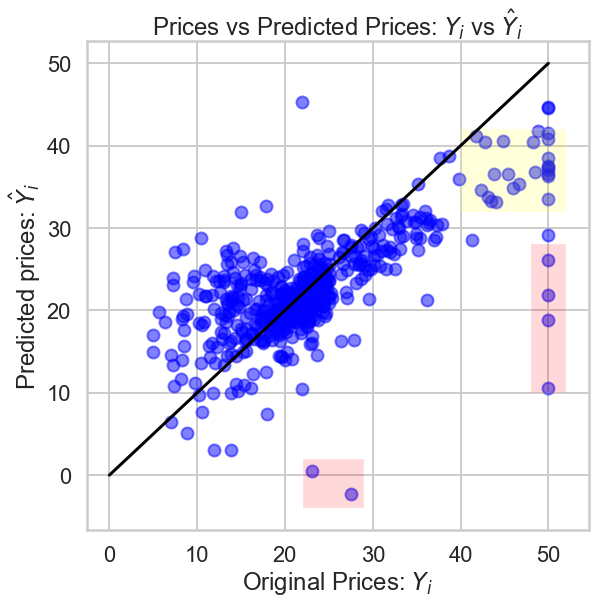

In [23]:
# Plot original prices vs predicted prices with ideal regression line
# Highlight outliers and out of the ordinary
plt.figure(figsize=(9,9))
plt.scatter(bos.PRICE, m.fittedvalues, color='blue', alpha=0.5)
plt.plot([0, 50], [0, 50], 'k-')
plt.fill_between([40,52], 32, 42, facecolor='yellow', alpha = .15, interpolate=True)
plt.fill_between([48,52], 10, 28, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([22,29], 2, -4, facecolor='red', alpha = .15, interpolate=True)
plt.xlabel("Original Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

On the plot above, the solid line indicates an ideal situation.  There is a strong, positive, linear relationship between the predicted price and the true price, indicating that the performance of the linear model is good in general, but: 
- Houses with values greater than about 40 are underpredicted using this model, as most predictions shaded in yellow are below the 45-degree gridlines.
- There is a ceiling effect on the housing price around 50, the cause is unclear at this point.
- The data points shaded in red appears to be outliers and there is a negative predicted price, which doesn't make sense as housing price should always be non negative.

Let's see how it looks when we add more features:

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     330.5
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          5.44e-139
Time:                        09:22:41   Log-Likelihood:                -1513.4
No. Observations:                 506   AIC:                             3037.
Df Residuals:                     501   BIC:                             3058.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          58.4664      8.105     

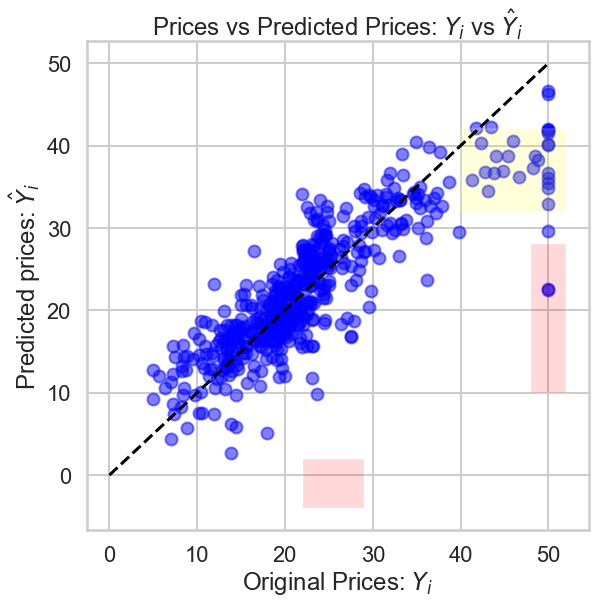

In [25]:
# Fit model with np.log of independent variables
# Plot original prices vs predicted prices with ideal regression line
# Highlight changes to outliers and out of the ordinary
m1 = ols('PRICE ~ np.log(LSTAT) + np.log(RM) + np.log(PTRATIO) + np.log(NOX)', bos).fit()
print(m1.summary())

plt.figure(figsize=(9,9))
plt.scatter(bos.PRICE, m1.fittedvalues, color='blue', alpha=0.5)
plt.plot([0, 50], [0, 50], 'k--')
plt.fill_between([40,52], 32, 42, facecolor='yellow', alpha = .15, interpolate=True)
plt.fill_between([48,52], 10, 28, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([22,29], 2, -4, facecolor='red', alpha = .15, interpolate=True)
plt.xlabel("Original Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

The added features give us an even more linear correlation between predicted prices and actual prices.  It also gets rid of some of the outliers, although we still see a ceiling above 40.

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression

# Keep all variables except target variable
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`reg.fit()` | Fit a linear model
`reg.predit()` | Predict Y using the linear model with estimated coefficients
`reg.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [27]:
# Look inside reg object
# reg.<tab>

Output | Description
--- | --- 
`reg.coef_` | Estimated coefficients
`reg.intercept_` | Estimated intercept 

### Fit a linear model
***

The `reg.fit()` function estimates the coefficients of the linear regression using least squares. 

In [28]:
# Use all 13 predictors to fit linear regression model
reg.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


#### Fitting an intercept vs. not fitting an intercept

In [29]:
# Function allows us to see summary just like OLS above
def findStats(model, X, y):
    """Function that allows us to see a summary of the intercept 
    (constant) and the coefficients for a regression model"""
    params = np.append(model.intercept_,model.coef_)
    predictions = model.predict(X)
    
    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))
    
    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b
    
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
    
    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4) # features
    
    features = list(["INTERCEPT"])
    features.extend(X.columns)
    
    myDF3 = pd.DataFrame()
    (myDF3['Features'],
     myDF3["Coefficients"],
     myDF3["Standard Errors"],
     myDF3["t-values"],
     myDF3["p-values"]) = [features,params,sd_b,ts_b,p_values]
    
    print(myDF3)

In [30]:
# Stats with linear regression and all independent variables
findStats(reg, X, bos.PRICE)

     Features  Coefficients  Standard Errors  t-values  p-values
0   INTERCEPT       36.4595            5.103     7.144     0.000
1        CRIM       -0.1080            0.033    -3.287     0.001
2          ZN        0.0464            0.014     3.382     0.001
3       INDUS        0.0206            0.061     0.334     0.738
4        CHAS        2.6867            0.862     3.118     0.002
5         NOX      -17.7666            3.820    -4.651     0.000
6          RM        3.8099            0.418     9.116     0.000
7         AGE        0.0007            0.013     0.052     0.958
8         DIS       -1.4756            0.199    -7.398     0.000
9         RAD        0.3060            0.066     4.613     0.000
10        TAX       -0.0123            0.004    -3.280     0.001
11    PTRATIO       -0.9527            0.131    -7.283     0.000
12          B        0.0093            0.003     3.467     0.001
13      LSTAT       -0.5248            0.051   -10.347     0.000


In [31]:
# INDUS and AGE have high p-values, look without them
X1 = bos.drop(['PRICE', 'INDUS', 'AGE'], axis = 1)
reg1 = LinearRegression()
reg1.fit(X1, bos.PRICE)

findStats(reg1, X1, bos.PRICE)

     Features  Coefficients  Standard Errors  t-values  p-values
0   INTERCEPT       36.3411            5.067     7.171     0.000
1        CRIM       -0.1084            0.033    -3.307     0.001
2          ZN        0.0458            0.014     3.390     0.001
3        CHAS        2.7187            0.854     3.183     0.002
4         NOX      -17.3760            3.535    -4.915     0.000
5          RM        3.8016            0.406     9.356     0.000
6         DIS       -1.4927            0.186    -8.037     0.000
7         RAD        0.2996            0.063     4.726     0.000
8         TAX       -0.0118            0.003    -3.493     0.001
9     PTRATIO       -0.9465            0.129    -7.334     0.000
10          B        0.0093            0.003     3.475     0.001
11      LSTAT       -0.5226            0.047   -11.019     0.000


If using all variables, the p-value for the intercept is 0 (rejecting the null that ther intercept is 0). Therefore, we should be fitting the intercept. However as we saw before (while using statsmodels) that the intercept was not statistically significantly different from 0, we could try and run the regression without fitting the intercept. If we do not want to fit intercept, we could use `fit_intercept=False` inside the LinearRegression( ) function as follows:

In [32]:
# Fit model without intercept
reg2 = LinearRegression(fit_intercept=False)
reg2.fit(X, bos.PRICE)
findStats(reg2, X, bos.PRICE)

     Features  Coefficients  Standard Errors  t-values  p-values
0   INTERCEPT        0.0000            5.362     0.000     1.000
1        CRIM       -0.0929            0.035    -2.691     0.007
2          ZN        0.0487            0.014     3.378     0.001
3       INDUS       -0.0041            0.065    -0.063     0.950
4        CHAS        2.8540            0.905     3.153     0.002
5         NOX       -2.8684            4.013    -0.715     0.475
6          RM        5.9281            0.439    13.502     0.000
7         AGE       -0.0073            0.014    -0.524     0.601
8         DIS       -0.9685            0.210    -4.622     0.000
9         RAD        0.1712            0.070     2.455     0.014
10        TAX       -0.0094            0.004    -2.378     0.018
11    PTRATIO       -0.3922            0.137    -2.853     0.005
12          B        0.0149            0.003     5.282     0.000
13      LSTAT       -0.4163            0.053    -7.813     0.000


To fit without an intercept term in the Statsmodels package, we can include -1 in the formula.


I would recommend fitting with an intercept term for the boston housing dataset, as there are no particular reasons to support that when all of the features $x_i$ are 0, the expected value of the housing price needs to be zero:
- For 'RM' (average number of rooms per dwelling), it makes intuitive sense that the house value should be zero when there is zero room, i.e., no house.
- For other features, however, it makes more sense to have an intercept term: for 'CRIM' (crime rate per capita), a crime rate of zero does not mean the house value in that area should be zero, instead it means the area is very safe and the house values should be relatively higher; Similarly, for 'NOX', a NOX concentration of zero does not mean a house cost nothing, instead it means the quality is better and the house value is higher.

#### One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed?

Let's use the intercept and get residuals using the first model, reg (using intercept and all 13 variables).

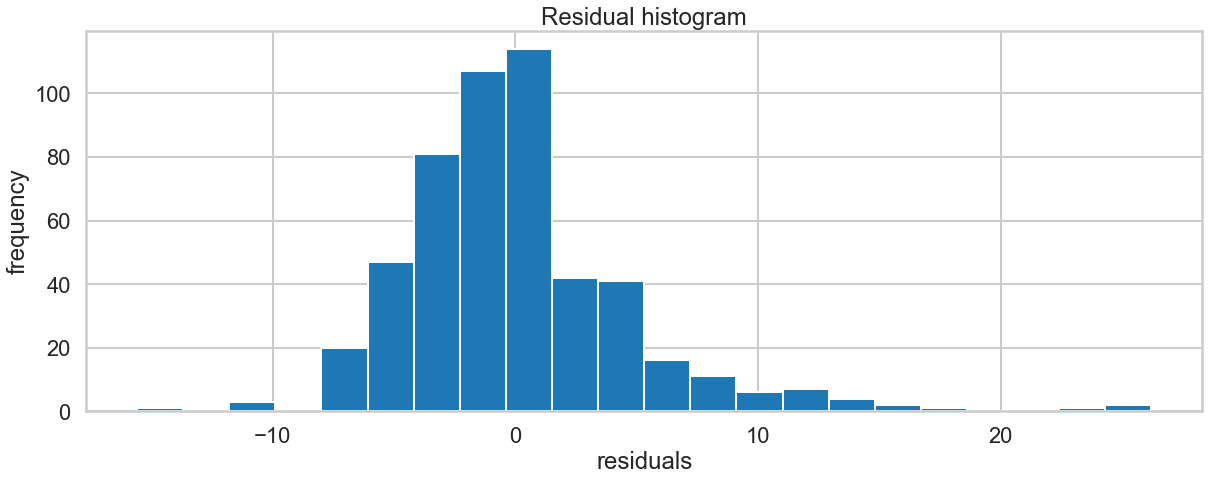

In [33]:
from scipy.stats import probplot, shapiro

# Predict prices
predicted = reg.predict(X)

# Find difference for each price and predicted price
resid = bos.PRICE-predicted

# Plot residuals
plt.figure(figsize=(20,7))
plt.hist(resid, bins=int(np.sqrt(len(resid))))
plt.title("Residual histogram")
plt.xlabel("residuals")
plt.ylabel("frequency")

plt.show()

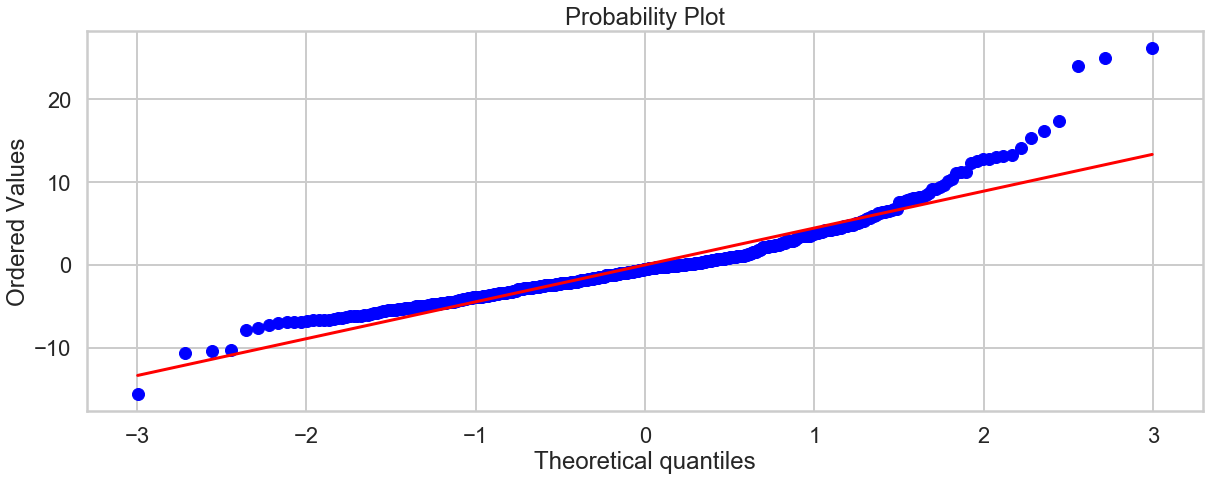

In [34]:
# Plot quantile plot to see if residuals are normally distributed
plt.figure(figsize=(20,7))
qq = probplot(resid, plot=plt)

In [35]:
# Print summary statistics
print("Mean: ", np.mean(resid))
print("Variance: ", (np.std(resid))**2)
print("Shapiro test: ", shapiro(resid))

Mean:  -4.988543614205051e-15
Variance:  21.89483118172921
Shapiro test:  (0.9013804793357849, 1.480129525706051e-17)


The mean of the residuals is very close to 0 with a finite variance. However, the residuals are not noramlly distributed as can be seen from histogram and `qq` plot.  Also, the normality test (Shapiro test) suggests that the residual distribution is significantly different from a normal distribution.

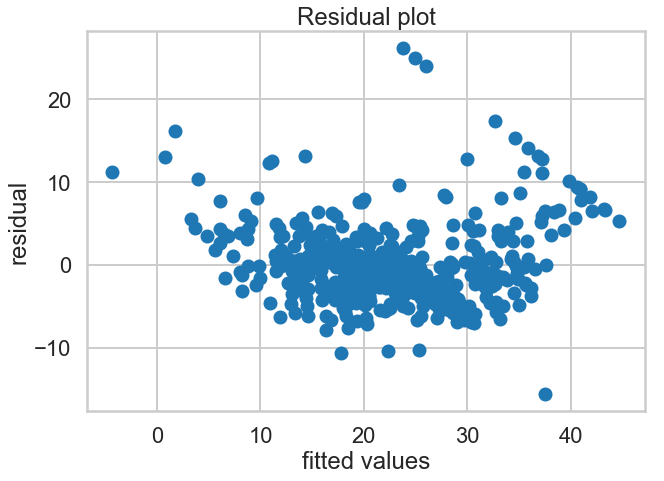

In [36]:
# Plot scatterplot of residuals and fitted values
# Check for any correlations
plt.figure(figsize=(10,7))
plt.scatter(x=predicted, y=resid)
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residual")
plt.show()

Normality does not necessarily imply that the residuals are independently and identically distributed (IID).  

The independency requires that the residuals for individual observations or predictions are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Even if the residuals are normally distributed, there could be dependency between residuals, for instance, in time series data and spatial analysis.

The identical distribution requires that the residuals for individual observations have equal variance around the regression line, i.e. homoscedastic. Even if all residuals are normally distributed, this might not be satisfied.

For example, the residual data looks identically distributed (almost same variance across all fitted values) and they have no actual upward or downward trend which correlates to the fitted values.  This means that the residuals are likely independently distributed.

#### True or false. To use linear regression,  $Y$ must be normally distributed. #### 

False. To use linear regression, $Y$ doesn't need to be normally distributed.

The assumptions for using linear regression are: 
1. The relationship between each predictor/feature $X$ is linearly or approximately linearly related to the dependent variable/target $Y$. 
2. the residual $\epsilon$ are normally distributed with a mean of 0 or close to 0 as much as possible.
3. the residuals $\epsilon$ for individual observations are independently distributed.
4. the residuals $\epsilon$ for individual observations are identically distributed, i.e.: homoscedasticity or equal variance of the residuals around the regression line.

But there is no assumption that $Y$ or the target variable needs to be normally distributed. This doesn't apply to the features or independent variables $x_i$ either.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `reg.intercept_` and `reg.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [37]:
print('Estimated intercept coefficient: {}'.format(reg.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [38]:
print('Number of coefficients: {}'.format(len(reg.coef_)))

Number of coefficients: 13


In [39]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': reg.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [40]:
# We can just use our function that we made 
findStats(reg, X, bos.PRICE)

     Features  Coefficients  Standard Errors  t-values  p-values
0   INTERCEPT       36.4595            5.103     7.144     0.000
1        CRIM       -0.1080            0.033    -3.287     0.001
2          ZN        0.0464            0.014     3.382     0.001
3       INDUS        0.0206            0.061     0.334     0.738
4        CHAS        2.6867            0.862     3.118     0.002
5         NOX      -17.7666            3.820    -4.651     0.000
6          RM        3.8099            0.418     9.116     0.000
7         AGE        0.0007            0.013     0.052     0.958
8         DIS       -1.4756            0.199    -7.398     0.000
9         RAD        0.3060            0.066     4.613     0.000
10        TAX       -0.0123            0.004    -3.280     0.001
11    PTRATIO       -0.9527            0.131    -7.283     0.000
12          B        0.0093            0.003     3.467     0.001
13      LSTAT       -0.5248            0.051   -10.347     0.000


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `reg.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

also can be understood from y = mx + b

In [41]:
# first five predicted prices
reg.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

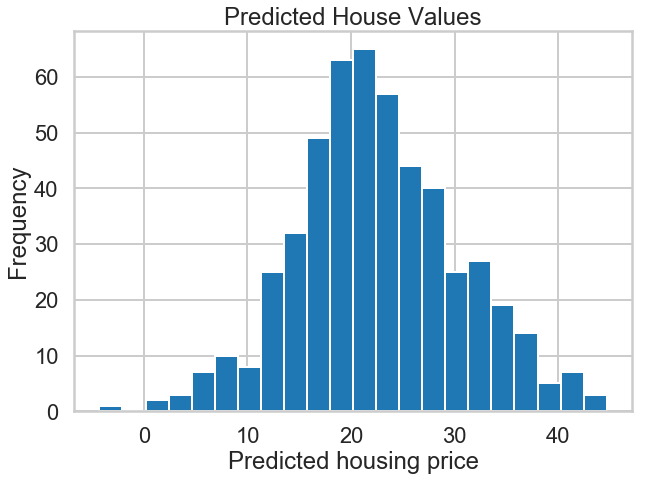

The mean of all the predicted prices is  22.532806324110677
The standard deviation of all the predicted prices is 7.907257740483541


In [42]:
predicted = reg.predict(X)

#histogram of predicted prices, prediction
plt.figure(figsize=(10,7))
plt.hist(predicted, bins=int(np.sqrt(len(predicted))))
plt.xlabel('Predicted housing price')
plt.ylabel('Frequency')
plt.title('Predicted House Values')
plt.show()
print("The mean of all the predicted prices is ", np.mean(predicted))
print("The standard deviation of all the predicted prices is", np.std(predicted))

In [43]:
from scipy.stats import describe
describe(predicted)

DescribeResult(nobs=506, minmax=(-4.281310709184851, 44.67308338731341), mean=22.532806324110677, variance=62.64853631101991, skewness=0.11071842432057091, kurtosis=0.10343116979610922)

The distribution of the fitted values is pretty normal with a unimodal distribution. The skewness of 0.11 suggests that the distribution is slightly positively skewed, probably due to outliers. 

There is a data point which is negative (-4.28) for the predicted house price. This is not normal because the price cannot have negative numbers. The possible reason for this abnormal prediction is related with outliers mentioned previously that causes the underestimation in predictions. The cause could also be from collinearity (using predictor variables that are highly correlated).

We also observe kurtosis = 0.1, indicating a very light tail.  In order to improve the model and get rid of negative predictions, we should remove the outliers in the input data first.

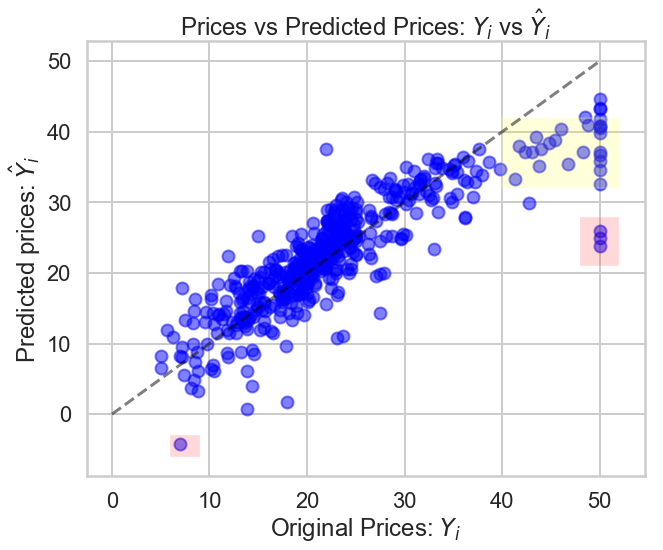

In [44]:
#scatterplot of predicted prices vs true prices
plt.figure(figsize=(10,8))
plt.scatter(bos.PRICE, predicted, color='blue', alpha=0.5)
plt.xlabel("Original Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.plot([0,50], [0,50], 'k--', alpha=0.5)
plt.fill_between([40,52], 32, 42, facecolor='yellow', alpha = .15, interpolate=True)
plt.fill_between([48,52], 21, 28, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([6,9], -3, -6, facecolor='red', alpha = .15, interpolate=True)
plt.show()

Similar to the plot for Statsmodels, the predicted price by scikit-learn generally has a good correlation to the true price, but: 
1. Several houses are underpredicted using this model, as most outlier predictions are below the 45-degree gridlines.
2. As we get above 40, all houses become underpredicted using this model.
3. There is a ceiling effect on the housing price around 50, the cause is unclear at this point. 
4. There is a negative predicted price, which doesn't make sense as housing price should always be non negative.

### Scikit-Learn vs Statsmodels

**Scikit-learn:**

Scikit-learn is advantagaeous in terms of writing the equation. In Scikit-learn, we just need to split the data to get features (X) and labels (y), and provide X and y as input. In case of Statsmodels, we need to explicitly write the expression.  

Using Scikit-learn to fit a linear model is also advantageous in that it creates a LinearRegression Object, which supports built-in methods, .fit(), .predict(), .score(), etc., for fitting, predicting and evaluating the model conveniently. When compared with Statsmodels, it provides limited information regarding the fitting results (coef and intercept) and performance ($R^2$, standard error).


**Statsmodels:**

Using Statsmodels to fit a linear model is advantageous in that it uses formulas and syntax that are similar to R. In addition, Statsmodels provide the .summary() method, which summarizes all useful information in one output, including: 
1. The correlation coefficient, standard error, $t$-statistic and the corresponding p-value, 95% confidence interval for the fitting parameters.
2. Many model performance related measures, $R^2$, $R^2_adj$, $F$-statistic, etc.
3. A descriptive summary of the model itself, such as the descriptive variable, the model and method used, the date and time the model was run, the number of observations used, etc. 

The Scikit-learn approach does not have this feature. This is the reason I defined a function manually to get the statistical summary. There is not much difference in the CPU time between both approaches. 

----
----
----

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [45]:
# RSS
print(np.sum((bos.PRICE - reg.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [46]:
# ESS
print(np.sum((reg.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. 

The **null hypothesis** is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The **alternative** is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discussed in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


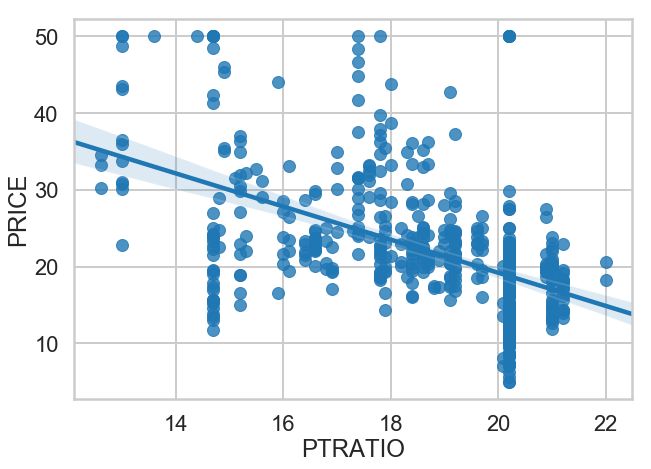

In [47]:
# Plot scatterplot with regression line
plt.figure(figsize=(10,7))
sns.regplot(x="PTRATIO", y="PRICE", data=bos)
plt.show()

In [48]:
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           1.61e-34
Time:                        09:23:05   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

**Intercept and Coefficient**

The intercept is 62.34, meaning that for towns with 0 pupil-to-teacher ratio ('PTRATIO'), the housing price will be 62.34k.  The coefficent is -2.16, meaning that for every one unit of increase in pupil-to-teacher ratio ('PTRATIO'), the housing price will drop by 2.16k.

**$R^2$ Explained** 

$R^2$ is 0.258, meaning that only 25.8% of the variation in housing price ('PRICE') is explained by the linear regression model of pupil-to-teacher ratio ('PTRATIO'). 'PTRATIO', alone, is not enough for predicting housing price ('PRICE') and other features should be introduced.

**$F$-statistic**

As described in the summary table, $F$-statistic is 175.1, with the corresponding p-value of $1.61e-34$. Based on the p-value, the null hypothesis that the $\beta$ coefficient for pupil-to-teacher ('PTRATIO') is zero can be rejected. Thus, the $\beta$ coefficient for pupil-to-teacher ('PTRATIO') is not zero.  That is, 'PTRATIO' has a statistically significant effect on housing price 'PRICE'.

**$F$-statistic vs $t$-statistic for simple linear regression model**

The $F$-statistic is the square of the $t$-statistic for 'PTRATIO' in this case (single variable regression).

The $F$-statistic is 175.1 with a p-value of $1.61e-34$; The $t$-statistic of the regression coefficient is -13.2 with a p-value of 0.000.   P-values calculated from both statistics are close to zero, indicating that the regression model is statistically significant. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [49]:
# Using Statsmodels in this case is more convenient
m3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           6.15e-98
Time:                        09:23:08   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

**$F$-statistic**

The $F$-statistic is 244.2, with a p-value of $1.09e−97$. Based on the p-value, the null hypothesis that all three coefficients are zero is rejected. Thus, at least one of the three $\beta$ coefficients for 'CRIM','RM' and 'PTRATIO' is not zero.


**$R^2$**

As described in the summary table, $R^2$ is 0.593, meaning that 59.3% of the variation in housing price ('PRICE') is explained in the linear regression model of 'CRIM' + 'RM' + 'PTRATIO'.  This model of three features is better than the one ('PTRATIO') model for predicting housing price.


**Coefficients** 

Among 'CRIM', 'RM' and 'PTRATIO', the most significant in predicting the housing price is 'RM' or the average number of rooms per dwelling. The coefficient is 7.38, meaning that the average housing price increases by 7.38k as the average number of rooms increase by one.

The next most significant predictor is 'PTRATIO' or the pupil-to-teacher ratio. The coefficient is -1.07, meaning that the housing price decreases by 1.07k as the pupil-teacher ratio increases by one.

'CRIM' also has an effect on housing prices. The coefficient is -0.20, meaning that the housing price decreases by 0.20k as the crime rate per capita increases by one unit.


**Not Using Intercept**
In this case, the intercept can be avoided in the model because its p-value is 0.413. In other words, the intercept is not significantly different from 0.  The numbers will change as a result to this factor as seen below.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [50]:
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT + AGE',bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          2.24e-122
Time:                        09:23:11   Log-Likelihood:                -1549.2
No. Observations:                 506   AIC:                             3110.
Df Residuals:                     500   BIC:                             3136.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5695      3.985      4.409      0.0

In [51]:
# Extract the RSS for model 3 (without the features 'AGE' and 'LSTAT')
rss3 = m3.ssr
# Calculate df for model 3
df3 = 506-3-1
# Extract the RSS for model 4 (with the features 'AGE' and 'LSTAT')
rss4 = m4.ssr
# Calculate df for model 4
df4 = 506-5-1

# Calculate F-statistic for comparing the two models
f = ((rss3-rss4)/(df3-df4))/(rss4/df4)
print("F-statistic for comparing the two models is ", f)

F-statistic for comparing the two models is  70.34614216547068


The $F$-statistic for the $F$-test comparing the two models is 70.346, with a p-value is close to zero, indicating that the new model with additional features, 'AGE' and 'LSTAT' is better.

The AIC for the new model with the features, 'AGE' and 'LSTAT', is 3110, whereas that for the old model without the 2 additional features is 3233. The new model's AIC is smaller, suggesting that the new model performs better, in agreement with the $F$-test.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
    
- **Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.


- **Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.


- **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot. $$ \epsilon_i \sim N(0, \sigma^2)$$ Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively.

 
- **Independent errors**.  The observations are assumed to be obtained independently.
    - e.g. Observations across time may be correlated


</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">

- **Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).


- **Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.

</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

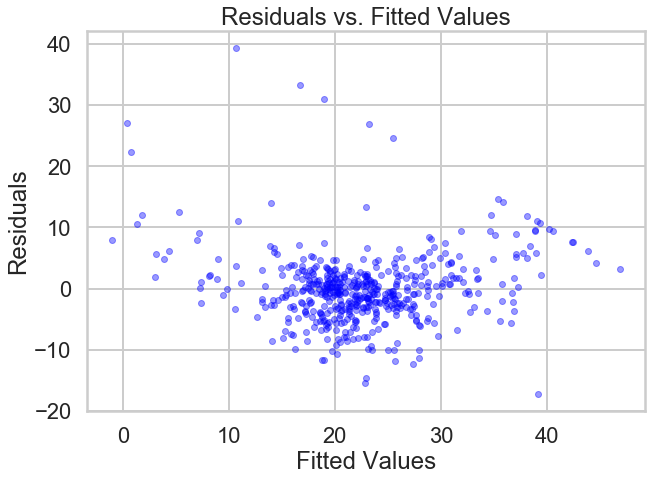

In [52]:
# Scatter Residual vs. Fitted
plt.figure(figsize=(10,7))
plt.plot(m3.fittedvalues, m3.resid, marker='.', linestyle='none', color='blue', alpha=0.4)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

The center cluster represents a random spread of points, indicating good homoscedasticity, but: 

1. There are a several large residuals, above 10 on both sides of 0.  This could lead to potential outliers.
2. There are also very large residuals on the positive side, e.g. > 20, these are likely outliers. 
3. There is a strange line of points in the upper right.

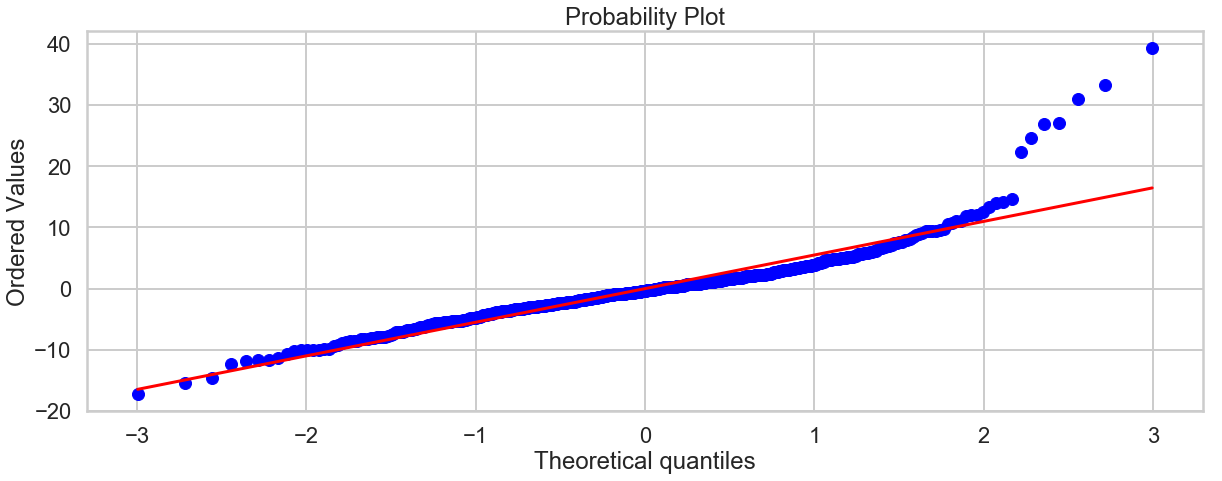

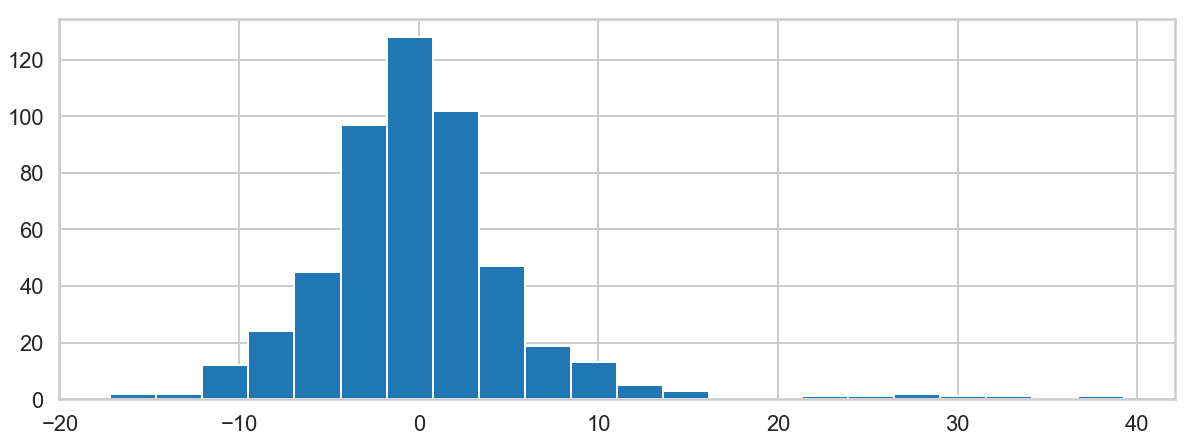

In [53]:
# Quantile plot of the residuals
plt.figure(figsize=(20,7))
qq = probplot(m3.resid, plot=plt)
plt.show()

plt.figure(figsize=(20,7))
a = plt.hist(m3.resid, bins=int(np.sqrt(len(m3.resid))))

**Probability plot**

The plot closely resembles a straight line, except for the upper tail (fitted value > 20), where several residuals are found to be larger than expected for a normal distribution. This indicates that the distribution is somewhat positively or right skewed with the right tail extending further than expected for the normal distribution. These larger than expected residuals could indicate potential outliers.


**Comparing residual vs fitted value plot with quantile plot**

The advantage of the residual vs. fitted value plot is that it shows the dispersion of residuals with regard to individual fitted values, so if there is any trend between residual and fitted values (heteroscedasticity), it will be easy to identify from the plot. Also, it's easy to identify and locate the outliers based on their fitted values.

The advantage of the quantile plot is that it summarizes all points to show how close to normal the residual distribution is. This plot is great for verifying the assumption that the residual $\epsilon$ are normally distributed with a mean of 0 or close to 0.

Both plots are good for spotting outliers, but the quantile plot may be easier to read while the former let's us know where these outliers are.


#### Identify any outliers (if any) in your model and write a story describing what these outliers might represent

Both plots suggest that points with large residuals (>20) could be potential outliers.

In [54]:
# Locate outliers based on the residual vs. fitted value plot and quantile plot 
outlier = bos[m3.resid > 20]
print(outlier)

# Compare the outliers to the summary statistics
print(bos.describe())

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
365   4.55587  0.0   18.1   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369   5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE  
365     20.2  354.70   7.12   27.5  
367     20.2  131.42  13.33   23.1  
368     20.2  375.52   3.26   50.0  
369     20.2  375.33   3.73   50.0  
370     20.2  392.05   2.96   50.0  
371     20.2  366.15   9.53   50.0  
372     20.2  347.88   8.88   50.0  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count 

These outliers have identical values for 'ZN', 'INDUS', 'RAD', 'TAX', and 'PTRATIO'. This suggests that they are from nearby locations. In addition, the 'CRIM', 'INDUS', 'RAD','TAX' and 'PTRATIO' for all these entries are high and located in the 4th quantile, whereas most of the 'PRICE' is at the maximum of all entries, 50k.

It is unlikely that an area with high crime rate, high pupil-to-teacher ratio, high tax rate and other undesirable features will have the most expensive houses.

Thus, these observations should be considered as outliers.

#### Construct leverage plot and identify high leverage points in the model

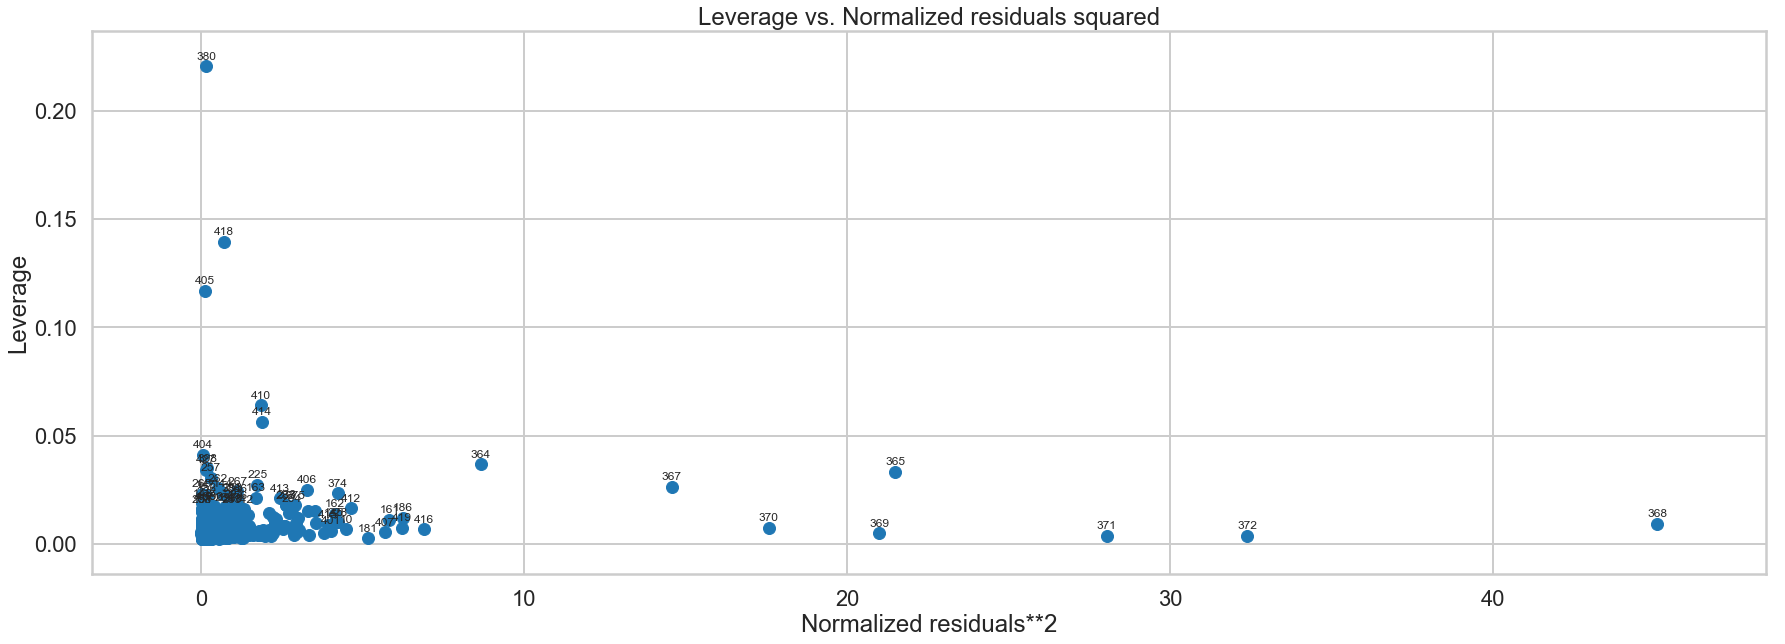

In [55]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
rcParams['figure.figsize'] = 30, 10
_ = plot_leverage_resid2(m3)

Observations with high leverage need special attention because the model fit may overly depend on them.
An observation is considered to have high leverage usually if its leverage exceeds 2p/n, where p is the number of predictors, including the constant, and n is the number of observations. 

In this case:

2p/n = 2*13/506 = 0.051. 

Thus, the entries with index 380, 418, 405, 410 and 414 are considered as observations with high leverage.

In [56]:
# Locate observations with high leverage
high_leverage = bos.loc[[380, 418, 405, 410, 414]]
print(high_leverage)

print('\n')
print(bos.CRIM.sort_values().tail(5))

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
380  88.9762  0.0   18.1   0.0  0.671  6.968   91.9  1.4165  24.0  666.0   
418  73.5341  0.0   18.1   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
405  67.9208  0.0   18.1   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
410  51.1358  0.0   18.1   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
414  45.7461  0.0   18.1   0.0  0.693  4.519  100.0  1.6582  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE  
380     20.2  396.90  17.21   10.4  
418     20.2   16.45  20.62    8.8  
405     20.2  384.97  22.98    5.0  
410     20.2    2.60  10.11   15.0  
414     20.2   88.27  36.98    7.0  


414    45.7461
410    51.1358
405    67.9208
418    73.5341
380    88.9762
Name: CRIM, dtype: float64


As shown above, the observations with high leverage are the observations with the highest crime rates across all observations. In addition, these entries also share identical values for 'ZN', 'INDUS', 'RAD', 'TAX', and 'PTRATIO' as the above identified outliers, suggesting the same origin of location. These entries should be removed from the model as the model fit might be overly dependent upon these entries with high leverage.

#### Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [57]:
# Remove outliers and high leverage points
remove = list(outlier.index) + list(high_leverage.index)
bos_no_out = bos.drop(index=remove)

In [58]:
# Run the linear regression fitting for bos_no_out
m5 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_no_out).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     426.4
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          3.64e-136
Time:                        09:23:19   Log-Likelihood:                -1456.3
No. Observations:                 494   AIC:                             2921.
Df Residuals:                     490   BIC:                             2937.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8011      3.259     -2.087      0.0

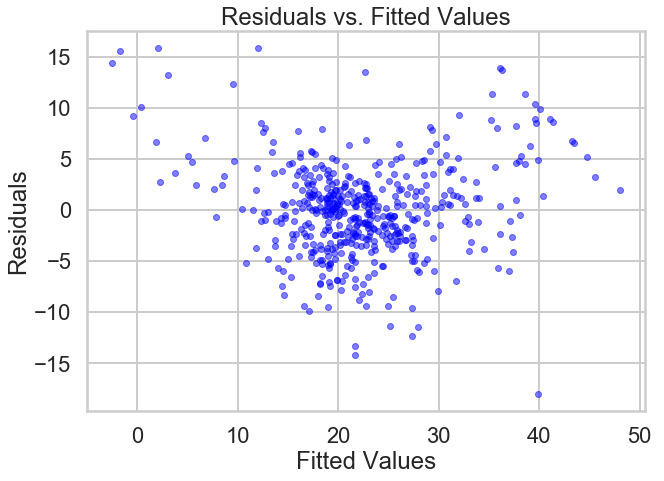

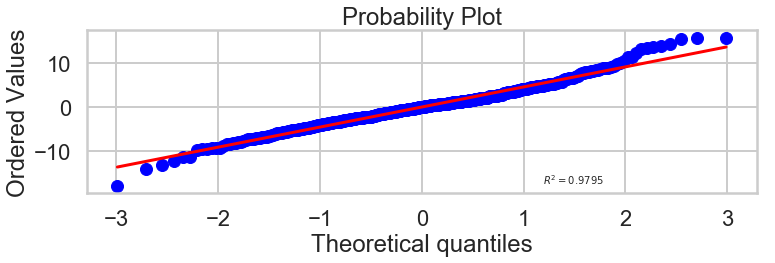

In [59]:
# residual vs. fitted values plot
plt.figure(figsize=(10,7))
plt.plot(m5.fittedvalues, m5.resid, marker='.',linestyle='none', color='blue',alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# quantile plot
plt.figure(figsize=(12,3))
probplot(m5.resid, plot=plt, fit=True, rvalue=True)
plt.show()

After removing the outliers and high leverage observations, the model has been improved with better $R^2$, $F$-statistic, and AIC. In addition, both the residual vs. fitted values plot and the quantile plot see significant improvements after removing the outliers and high leverage points.